# South African Language Identification

© Explore Data Science Academy

---
### Honour Code

I {**Emmanuel Okoro**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### EDSA 2022 Classification Hackathon


### Problem Statement

My clients would like to develope a proces that will aid other systems and devices communicate in Saouth Africa multi-languages.

The system should be able to take in text which is in any of South Africa's eleven Official languages and identify which language the text is in. 

### Process

- analyse the supplied data
- identify potential errors in the data and clean the existing data set
- determine if additional features can be added to enrich the data set
- build a model that is capable of identifying languages from text
- evaluate the accuracy of the best machine learning model
- determine determine language from text
- explain the inner working of the model to a non-technical audience.
  

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
import re
import string
import numpy as np
import pandas as pd


from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.utils import resample

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report


from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_train = pd.read_csv('data/train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, I will perform an in-depth analysis of all the variables in the DataFrame. |

---


### Data Analysis
For this section, we carry out two different types of data analysis:
- Univariate \
    i. non-graphical \
    ii. graphical 
- Multivariate \
    i. non-graphical \
    ii. graphical

#### Univariate Non-Graphical Analysis
For this analysis, we are going to view dataset on the below checks:  \
    i.  Check for the presence of *null* values  \
    ii. Descriptive statistical values *mean, std, minimum, quatiles, maximum, and kurtosis*  
    iii. Dataset data types

### Null values check

The presence of null value in our dataset, will negatively impact on the choice of model, hence it is necesary we confirm if null values exist in the data set to enable me decide on how to treat same before modeling.

In [ ]:
# Checks for null values in the data set
df_train.isnull().sum()

### Data type check

For this operation, we confirm the datatypes of each column in the data set, to enable us decide on what columns have the desired data type for our choice of model

In [5]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


### Unique values

Having confirmed that the data set is void of null values, the next task will be to check for the numbers of unique values present, and in what numbers.

In [6]:
# A function that gets the numbers of unique values in a dataframe column
def unique_val(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs an interger, which is the number of unique 
        values in the column.
    """
    return df[col].nunique()

In [7]:
# Check the numbers of unique values for the lang_id column
print(f'The numbers of unique values in the lang_id column is : {unique_val(df_train, "lang_id")}')

The numbers of unique values in the lang_id column is : 11


From the above results, the lang_id column contains eleven different unique values, and we want to see how this values
are distributed in the column.
To achieve this, we write a function called *unique_val_count*.

In [8]:
def unique_val_count(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs a dictionary, which contains the unique values as a key, and the numbers as values.
    """
    distribution = {}
    unique_vals = df[col].unique()
    for val in unique_vals:
        distribution[val] = df[df[col] == val][col].count()
    
    return distribution

In [9]:
unique_val_count(df_train, 'lang_id')

{'xho': 3000,
 'eng': 3000,
 'nso': 3000,
 'ven': 3000,
 'tsn': 3000,
 'nbl': 3000,
 'zul': 3000,
 'ssw': 3000,
 'tso': 3000,
 'sot': 3000,
 'afr': 3000}

### Univariate graphical inspection of data
For this analysis, we view the individual colunms using histogram plot.

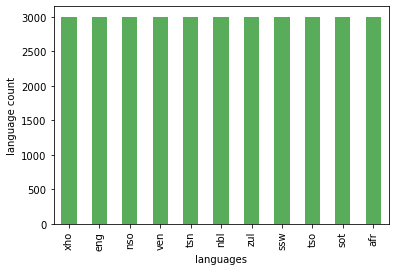

In [10]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['lang_id'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('languages')
ax.set_ylabel('language count')
plt.show()

### Visualise the most common words for each unique language

To achieve this act, we make use of word cloud.

In [11]:
# Create new dataframe for word cloud
df_train_cloud = df_train.copy()
df_train_cloud.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [12]:
# Preproceessing functions
def preprocess_lang(df, col):
    """ Functions takes in a pandas dataframe and performs a series of steps on 
        the tweet/message/text column"""
    # Converting the whole text to lowercase
    df[col] = df[col]. apply(lambda x: x.lower())

    # Removing the twitter usernames from tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'http\S+', ' ', x))

    # Deleting everything that is not characters
    df[col] = df[col]. apply(lambda x: re.sub(r'[^a-z A-Z]', ' ', x))

    # Deleting any word which is less than 3-characters mostly those are stopwords
    df[col] = df[col]. apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

    # Stripping extra spaces in the text
    df[col] = df[col]. apply(lambda x: re.sub(r' +', ' ', x))
    
    return df

preprocess_lang(df_train_cloud, 'text')

df_train_cloud.head()

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province kwazulu natal department transpor...
3,nso,netefat gore file dilo moka dumelelanego ona ...
4,ven,khomishini ndinganyiso mbeu ewa maana nga mula...


In [13]:
# Create a function that creates a list of dataframes with unique values
def create_df(data, col):
    """
        This function accept a dataframe, a column, which unique values serves as a condition for the numbers of 
        new dataframes it forms. It returns a list of dataframe
    """
    col_val = data[col].unique()
#     for val in col_val:
#     df_list.append(df_train_cloud[df_train_cloud[col]== val])
    df_list = [data[data[col]== val] for val in col_val]
    
    
    return df_list
    

In [14]:
# Create a list of dataframe with the unique languages in the lang_id column
languages_df = create_df(df_train_cloud, 'lang_id')

print(f' Created {len(languages_df)} new dataframes for the languages')

 Created 11 new dataframes for the languages


In [15]:
languages_df[0].head()

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi nap...
28,xho,langa eli xesha nesizathu salo zingasinika ama...
43,xho,abafaki zicelo abadla umhlala phantsi ncedani ...
59,xho,intsilelo ligcisa ukthobela ukuziphatha okumis...


In [16]:
# Create a function that returns a list of documents from each language dataframe

def creat_doc(df_list, text_col):
    """
        This function accepts a list of dataframes, and a column with text values, which it references to create a document
        with all text in the column.
        It returns a list of documents.
    """
#     doc_list = [lambda df : " ".join(text for text in df[tex_col])  for df in df_list]

    doc_list = []
    
    for df in df_list :
        doc =   " ".join(text for text in df[text_col])
        doc_list.append(doc)
    
    return doc_list

In [17]:
# Create a list of documents for the text column in each dataframes stored in languages_df
documents_list = creat_doc(languages_df, 'text')

print(f' Created {len(documents_list)} list of documents from the dataframes of unique languages created above')

 Created 11 list of documents from the dataframes of unique languages created above


In [18]:
# documents_list[0]

In [19]:
# Create a function to generate a list of world cloud from the document list created above
def generate_wordCloud(doc_list):
    """
        This function recieves a list of documents, generates and returns a list of word cloud for each document in the list.
    """
#     word_cloud_list = [lambda doc : WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc)
#                       for doc in doc_list]
    word_cloud_list = []
    
    for doc in doc_list :
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc)
        word_cloud_list.append(wordcloud)
        
    return word_cloud_list

In [20]:
# Create a list of word cloud for each document in the document list created above
wordcloud_list = generate_wordCloud(documents_list)

print(f' Created {len(wordcloud_list)} list of world cloud for each document in the document list created above')

 Created 11 list of world cloud for each document in the document list created above


In [21]:
# Create a function to display the word in each worldcloud item for the world cloud list generated above.

def display_wordcloud(word_list):
    """
        This function recieves a list of word cloud, and a corresponding label list for the word cloud. 
        It prints each word cloud in the list
    """
    languages = df_train['lang_id'].value_counts().index.to_list()
    fig, ax = plt.subplots(len(word_list), 1, figsize  = (30,30))
    for index, word in enumerate(word_list):
        ax[index].imshow(word, interpolation='bilinear')
        ax[index].set_title(languages[index],fontsize=30)
        ax[index].axis('off')

    return None

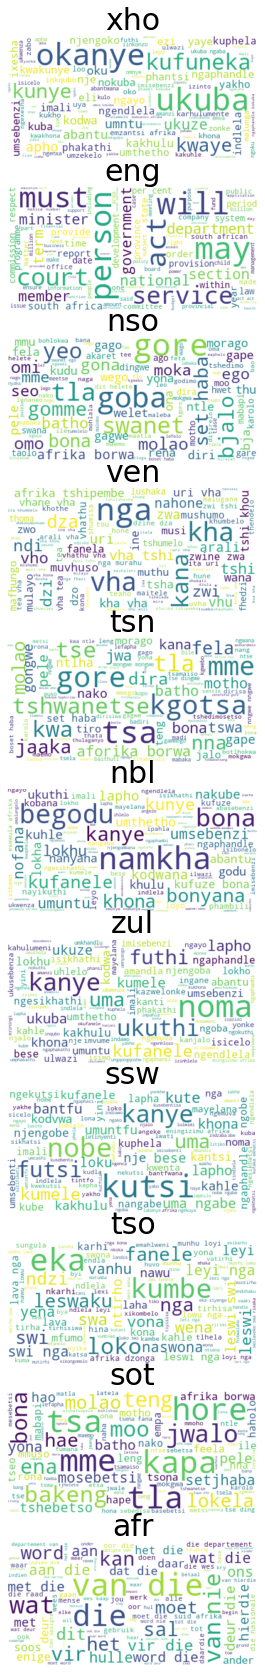

In [22]:
display_wordcloud(wordcloud_list)


## Also include findings from world cloud in EDA summary

### EDA summary
- The dataset contains two columns (lang_id and text)
- Both columns in the data set are in string format
- text columns contains writen words in different languages
- lang_id columns contains the language name for the corresponding text columns

In [23]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## Text Cleaning

### Removing Noise

For the given dataset, we identified that the *message* column contains the novel tweet for each userid, which we are espected to classify. 
For us to proceed we have to carry out cleaning on this messages. This cleaning will be achieved through:
* identify and remove web-urls from the main message 
* idendify and remove words started with '#'
* idendify and remove words started with '@'
* making everything lower case
* removing punctuation



#### Remove web-url from message

We write a function called *delete_url*. This function uses regex to identify web-url in a column and remove same from the column.

In [24]:
def delete_url(data, col):
    """
        Accepts a dataframe and col., removes web urls from the col.
        returns a new dataframe 
    """
    df = data.copy()
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ''
    df[col] = df[col].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

In [25]:
# Create a new dataframe with message colun void of url links
new_df_train = delete_url(df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [26]:
# Confirm that the above operation was successful 
new_df_train['text'][0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [27]:
df_train['text'][0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [28]:
def word_converter(data, col):
    """
        This function takes in a dataframe and col, converts all capitalized words in the column to lowercase,
        and returns a new dataframe.
    """
    df = data.copy()
    df[col] = df[col].str.lower()
    return df

In [29]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = word_converter(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Remove punctuation

We write a function *remove_punc* that uses the string package from python to remove punctions.

In [30]:
def remove_punc(data, col):
    """
        This function takes in a dataframe and a column, uses python string package to identify and remove all
        punctions in the column. It returns a new dataframe
    """
    def operation(post):
        return ''.join([l for l in post if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [31]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_punc(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Remove new lines (\n)  the start of any words

We noticed that some words start with '\n' and this is a short form for new line in programming, words started with \n looses its original meaning.

Hence we write a function remove_new_line to execute this task.

In [32]:

def remove_new_line(data, col):
    """
        Takes in a dataframe and a column, returns a new dataframe with a new column void of new line command
    """

    def operation(text):
        result = re.sub("\n", "", text)
        
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

In [33]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_new_line(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Tokenisation

We write a function *tokenizer* to tokenize the words in the message column and store same in a new column named *message_tok*

In [34]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['message_tok'] = df[col].apply(tokeniser.tokenize)
    return df

In [35]:
# Create a new column to hold the tokens from message column
new_df_train = tokenizer(new_df_train, 'text')
new_df_train.head()

,lang_id,text,message_tok
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


### Larmming

We write a function *lam_words* to transform all words in the *message_tok* column to its root form using Lemmatization, to enable us acrter for the shortfall in stemming above.

In [36]:
def lam_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of WordNetLemmatizer class from the nltk package.
        Returns a new dataframe with an additional column "message_lam"
    """
    lemmatizer = WordNetLemmatizer()
    def operation(words, lemmatizer):
        return [lemmatizer.lemmatize(word) for word in words] 
    df = data.copy()
    df["message_lam"] = df[col].apply(operation, args=(lemmatizer, ))
    
    return df

In [37]:
# Create a new column to hold root words from stemmer
new_df_train = lam_words(new_df_train, 'message_tok')
new_df_train.head()

,lang_id,text,message_tok,message_lam
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


### Remove stop words
Stop words are words which do not contain important significance to be used in Search Queries. 
We write a function *remove_stop_word*, that removes stop words in a speified column.

In [38]:
def remove_stop_words(data, col):
    """
        Takes a dataframe and a column, creates a new dataframe with a new column no_stop_word from the input
        dataframe and column, returns the new column
    """
    def operation(toks):
        new_toks = [tok for tok in toks if tok not in stopwords.words('english')]
        new_toks = [tok for tok in new_toks if len(tok) > 2]
        return new_toks
    
    df = data.copy()
    df['no_stop_word'] = df[col].apply(operation)

    return df

In [39]:
# Create a new column from message_lam void of stop words
new_df_train = remove_stop_words(new_df_train, 'message_lam')
new_df_train.head()

,lang_id,text,message_tok,message_lam,no_stop_word
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, province, of, kwazulunatal, department, ...","[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[netefatša, gore, file, dilo, moka, tše, dumel..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ndinganyiso, mbeu, ewa, maana, ng..."


### Check for the presence of noise as non-alphanumeric worlds

In [40]:
def word_type_checker(data, col):
    alphanum_count = 0 
    non_alphanum_count = 0
    
    def operation(str_list , alphanum_count ,non_alphanum_count):
        alphanum = alphanum_count
        non_aphanum = non_alphanum_count
#         print(f'past row values: {(alphanum, non_aphanum)}') # for testing 
        for strg in str_list:
            if strg.isalnum():
                alphanum = alphanum + 1
            else:
                non_aphanum = non_aphanum + 1
        
        return (alphanum ,non_aphanum)
    
    for label, sr in data.iterrows():
        (alphanum_count, non_alphanum_count) = operation(sr[col] , alphanum_count, non_alphanum_count)
#         Uncomment the codes below for testing of this function
#         print(f'accumulated values: {(alphanum_count, non_alphanum_count)}') 
#         if label == 20:
#             break
    
    return (alphanum_count, non_alphanum_count)
            
    

In [41]:
(alphanumeric, non_alphanumeric) = word_type_checker(new_df_train, 'no_stop_word')
(alphanumeric, non_alphanumeric)

(879037, 198)

### Convert processed words to corpus

Before we can transform the words in numeric type, for each column we have to remove the delimeters introduced during tokennization. This process is needed to enable us form a **corpus**.
To achieve this, we write a function **form_corpus**.

In [42]:
def form_corpus(data, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(de_tok), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = data.copy()
    df['de_tok'] = df[col].apply(operation)
    
    return df

In [43]:
# Create a new column from no_stop_word void of delimeters
new_df_train = form_corpus(new_df_train, 'no_stop_word')
new_df_train.head()

,lang_id,text,message_tok,message_lam,no_stop_word,de_tok
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, province, of, kwazulunatal, department, ...","[province, kwazulunatal, department, transport...",province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[netefatša, gore, file, dilo, moka, tše, dumel...",netefatša gore file dilo moka tše dumelelanego...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ndinganyiso, mbeu, ewa, maana, ng...",khomishini ndinganyiso mbeu ewa maana nga mula...


In [44]:
# Drop every other columns except sentiment and de_tok columns
df_train_reduced = new_df_train[['lang_id', 'de_tok']]
df_train_reduced.head()

,lang_id,de_tok
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,province kwazulunatal department transport inv...
3,nso,netefatša gore file dilo moka tše dumelelanego...
4,ven,khomishini ndinganyiso mbeu ewa maana nga mula...


In [45]:
# Define DataSetSelector, store the data sets, and define data_set, which contains the selected data set

data_set = df_train_reduced

### Transforming text into numbers

- CounterVectorizer
- TfidfVectorizer

Most models do not work well with text, hence the need to convert our text into numbers. To execute this task and more, we can use **CountVectorizer** or **TfidfVectorizer** packages from sklearn library.



#### CountVectorizer
**CountVectorizer** has some **hyperparameters** which we can asign desired values to while initialising. 
The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

In [46]:
# Initialize an object of CountVectorizer
count_vector = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(2, 2))

#### TfidfVectorizer
**TfidfVectorizer** has some **hyperparameters** which we can asign desired values to while initialising. 
The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

In [57]:
# DO NOT RUN THIS VECTORIZER USING THE DEFAULT max_features hyperparameter setting
# Initialize an object of TfidfVectorizer
tfidf_vector = TfidfVectorizer(max_features=100000,ngram_range=(1, 2))

### Vectorizer Countainer

We proceed to store the two vectorizers (CountVectorizer and TFidfVecorizer ) in a container( python list) named **VectorizerSelector**, which enables us to use index number (0,1), to select any vectorizer of choice 

In [58]:
# Define VectorizerSeelector, a list of defined vectorizer, and selects the desired vectorizer with index number,
# store the selected vectorizer in a variable named vector.

VectorizerSelector = [count_vector , tfidf_vector]

vector = VectorizerSelector[1]

### Data Transformation 

We proceed to transform the features of the data set (**data_set**), with our choosen vectorizer **vector**, and store the transformed 
data in a variable called X_count

In [59]:
# Fit and Transform the de_tok column fit_transform method
X_count = vector.fit_transform(data_set['de_tok'].values.astype(str))
X_count.shape

(33000, 100000)

#### Extract dependant for data set

In [60]:
# Collect the dependant variable into a variable
y = data_set['lang_id']
y[:10]

0    xho
1    xho
2    eng
3    nso
4    ven
5    nso
6    tsn
7    ven
8    nso
9    tsn
Name: lang_id, dtype: object

In [61]:
# See feature names
# vect_df.get_feature_names()

In [62]:
X_count.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Convert vectorised data set back to dataframe form

In [63]:
model_df = pd.DataFrame(data=X_count.toarray(),columns = vector.get_feature_names())
model_df.head()

,aan,aan alle,aan almal,aan ander,aan artikel,aan beampte,aan bied,aan bladsy,aan boete,aan bring,...,ṱun phukha,ṱun una,ṱun ḓwa,ṱun ḓwaho,ṱuse,ṱutshela,ṱuwa,ṱuṱuwedza,ṱuṱuwedzwa,ṱuṱuwedzwa nga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Spliting of data set

Before we proceed to modelling, we have to split our data set into two sets (Training and Testing), to enable us internally evaluate the respective performance of our models. to achive this, we make use of sklearn **train_test_split** class.

In [64]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(model_df, y, test_size=0.2, random_state=RANDOM_STATE)

### Model and model evaluation

We write a function **model_eval**, that uses the training and test features and labels data set generated above, to train a model, make prediction with the model, and output the models performance with the aid of **classification_report** from sklearn.

In [65]:
def model_eval(model):
    """
        This function accepts a model as an input, train and make predictions with the model, using the train and test
        data set generated above, and ouput the trained model and the model's performance as a tuple.
    """
    model.fit(model_df, y)
    y_pred = model.predict(X_test)
    
    return (model, classification_report(y_test, y_pred))

### Tunning models

For this purpose we will use sklearn's **GridSearchCV**. This procedure allows us to specify a set of possible parameters for a specific model. GridSearchCV will then go through those parameters and try every possible combination of them (kind of like it's working through a grid in a systematic way - that's where the name comes from). GridSearchCV will then return the combination of parameters that resulted in a model with the best score.

### Logistics Regression
We proceed to create an instance of **Logistics Regression model** and manually set our desired hyperparameter
#### Instanciate Logistic Regression Model

In [ ]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(multi_class='ovr')

# Train, predict and evaluate model performance 
(logreg_model, model_per) = model_eval(logreg_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)

#### RandomForest Classification Model

We proceed to create an instance of **RandomForestClassifier model** and manually set our desired hyperparameter

In [ ]:
# Instanciate a RandomForestClassification model
randomF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train, predict and evaluate model performance 
(randomF_model, model_per) = model_eval(randomF_model)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)

### SVM Model
We proceed to create an instance of **SVM model** and create a list for each hyperparameter settings that we may be interested in seting, storing these list in a python dictionary, which we will then pass into sklearn GridSearch, which is a library from sklearn used in determining the best hyperparameter tunning for the inputed model passed into it.


In [66]:
# instantiate a Support Vector Machine model

svc =  LinearSVC()


# # Create and store hyperparameters values
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]

# # Store hyperparameters in a dictionary
# parameters = {
#     'C' : Cs,
#     'gamma' : gammas
# }

# # Instanciate a GridsearchCV and train same with 
# svc_model = GridSearchCV(svc, parameters)

# Train, predict and evaluate model performance 
(svc_model, model_per) = model_eval(svc)

# Print model classification report
print("\n\nClassification Report:\n\n",model_per)



Classification Report:

               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Test data set ( for kaggle submission )

To enable us make prediction with our model, we have to import the **test** dataset and execute all data engineering operation executed on the **train** dataset.

These activities are: 
- **delete urls**
- **delete tags**
- **convert words to lowercases**
- **remove punctions**
- **remove newlines**
- **tokenize**
- **stemming**
- **larmming**
- **remove stop words**

In [67]:
# Import and view the first 5 rolls of our training dataset
df_test = pd.read_csv('data/test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [68]:
# Create a new dataframe with message colun void of url links
new_df_test = delete_url(df_test, 'text')
new_df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [69]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_test = word_converter(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


In [70]:
# Create a new dataframe with the message colmn void of punctuations
new_df_test = remove_punc(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [71]:
# Create a new dataframe with the message colmn void of punctuations
new_df_test = remove_new_line(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [72]:
# Create a new column to hold the tokens from message column
new_df_test = tokenizer(new_df_test, 'text')
new_df_test.head()

,index,text,message_tok
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]"


In [73]:
# Create a new column to hold root words from stemmer
new_df_test = lam_words(new_df_test, 'message_tok')
new_df_test.head()

,index,text,message_tok,message_lam
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...","[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]","[winste, op, buitelandse, valuta]"


In [74]:
# Create a new column from message_lam void of stop words
new_df_test = remove_stop_words(new_df_test, 'message_lam')
new_df_test.head()

,index,text,message_tok,message_lam,no_stop_word
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...","[mmasepala, fa, maemo, a, a, kgethegileng, a, ...","[mmasepala, maemo, kgethegileng, letlelela, kg..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]","[winste, op, buitelandse, valuta]","[winste, buitelandse, valuta]"


In [75]:
# Create a new column from no_stop_word void of delimeters
new_df_test = form_corpus(new_df_test, 'no_stop_word')
new_df_test.head()

,index,text,message_tok,message_lam,no_stop_word,de_tok
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...","[mmasepala, fa, maemo, a, a, kgethegileng, a, ...","[mmasepala, maemo, kgethegileng, letlelela, kg...",mmasepala maemo kgethegileng letlelela kgato
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em...","[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]","[tshivhumbeo, tshi, fana, ngano, dza, vhathu]",tshivhumbeo tshi fana ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t...","[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]","[winste, op, buitelandse, valuta]","[winste, buitelandse, valuta]",winste buitelandse valuta


In [76]:
# Drop every other columns except sentiment and de_tok columns
df_test_reduced = new_df_test[[ 'de_tok']]
df_test_reduced.head()

,de_tok
0,mmasepala maemo kgethegileng letlelela kgato
1,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,tshivhumbeo tshi fana ngano dza vhathu
3,kube inja nelikati betingevakala kutsi titsini...
4,winste buitelandse valuta


### Transform test dataset 

We transform the test dataset using the chosen vectorizer ***vector** from the vectorizer section above


In [77]:
# Transform the de_tok column
X_count_test = vector.transform(df_test_reduced['de_tok'].values.astype(str))
X_count_test.shape

(5682, 100000)

In [78]:
text_df = pd.DataFrame(data=X_count_test.toarray(),columns = vector.get_feature_names())
text_df.head()

,aan,aan alle,aan almal,aan ander,aan artikel,aan beampte,aan bied,aan bladsy,aan boete,aan bring,...,ṱun phukha,ṱun una,ṱun ḓwa,ṱun ḓwaho,ṱuse,ṱutshela,ṱuwa,ṱuṱuwedza,ṱuṱuwedzwa,ṱuṱuwedzwa nga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Make predictions with the models generated above for kaggle submission :
- **logreg_model** (Logistics Regression model)
- **randomF_model** (RandomForestClasifier model)
- **svc_model** (SVC model)


#### Logistic Regression Model

In [104]:
# Make prediction with logistics regression model and the test data
y_pred_logistic = logreg_model.predict(text_df)

#### RandomForestClasifier Model

In [107]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_random = randomF_model.predict(text_df)

#### Support Vector Machine Model

In [79]:
# Make prediction with RandomForestClasifier model and the test data
y_pred_svc = svc_model.predict(text_df)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### Convert the predictions of the models to dataframes

We have generated predictions for three different models above:
- **y_pred_logistic** (Logistics Regression model)
- **y_pred_random** (RandomForestClasifier model)
- **y_pred_svc** (SVC model)

#### Logistics Regression

In [81]:
# Generate index 
size =  df_test.index.to_list()
index = [x+1 for x in size]

In [105]:
# Choose best model and motivate why it is the best choice

df = pd.DataFrame({
    'index': index,
    'lang_id': y_pred_logistic
})

df.head()

,index,lang_id
0,1,ssw
1,2,nbl
2,3,xho
3,4,ssw
4,5,ssw


In [101]:
df.to_csv('file_001.csv',index=False)

#### RandomForestClasifier

In [108]:
downsampled_df = pd.DataFrame({
    'index': index,
    'lang_id': y_pred_random
})

downsampled_df.head()

,index,lang_id
0,1,ssw
1,2,ssw
2,3,ven
3,4,ssw
4,5,ssw


In [109]:
downsampled_df.to_csv('file_002.csv',index=False)

#### Support Vector Machine

In [82]:
upsampled_df = pd.DataFrame({
    'index': index,
    'lang_id': y_pred_svc
})

upsampled_df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,ssw


In [83]:
upsampled_df.to_csv('file_003.csv',index=False)

### Logging Results to Comet

#### Model Performance Metrics

In [ ]:
# Generate all metrics for model performance
# f1 = f1_score(y_true, y_pred_test, average = 'weighted')
# precision = precision_score(y_true, y_pred_test, average ='weighted')
# recall = recall_score(y_true, y_pred_test,average = 'weighted')
# accuracy = accuracy_score(y_true, y_pred_test)

### Create disctionary for data to be stored on Comet_ml

In [ ]:
# Generates two dictionaries, parameters and metric values
# params = {
#     'random_state': RANDOM_STATE,
#     'model_type': 'Logistics Regression'
# }

# metrics ={
#     'Accuracy': accuracy,
#     'precision': precision,
#     'recall': recall,
#     'f1': f1,
# }
# metrics

### Log parameters and metrics to commet_ml

In order to adher to a fundamental pricinple of programming **DRY**(do not repeat yourself), we define a function **experiment_logger** to achieve this. This is because this is a group project with multiple comet_ml API keys. 

In [ ]:
def experiment_logger(experiments):
    """
        This function takes in a list of comet_ml defined experiments, and logs the parameters and metric values,
        for this notebook to the respective experiments. It has a return value of None
    """
    for experiment in experiments :
        experiment.log_parameters(params)
        experiment.log_metrics(metrics)
    return None
        

In [ ]:
# # Create a list of comet experiments for this project
# comet_experiments = [ experiment]

# # Log the respective experiments parameter and metric values
# experiment_logger(comet_experiments)

### End all comet experiment after loging the parameters

To adhre to the **DRY** principle, we write a function **end_comet** to achieve this


In [ ]:
def end_comet(experiments):
    """
        This function takes in a list of comet_ml defined experiments, and ends the experiments.
        It has a return value of None.
    """
    for experiment in experiments :
        experiment.end()
        
    return None

In [ ]:
# # End all experiments
# end_comet(comet_experiments)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---